In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = yf.download('BTC-USD', '2015-01-01', '2021-10-01')

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close'].values

[*********************100%***********************]  1 of 1 completed


In [3]:
def lineplot(x, y):
    plt.figure(figsize=(10, 6), dpi = 500)
    return sns.lineplot(x, y)

/Users/bengroves/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

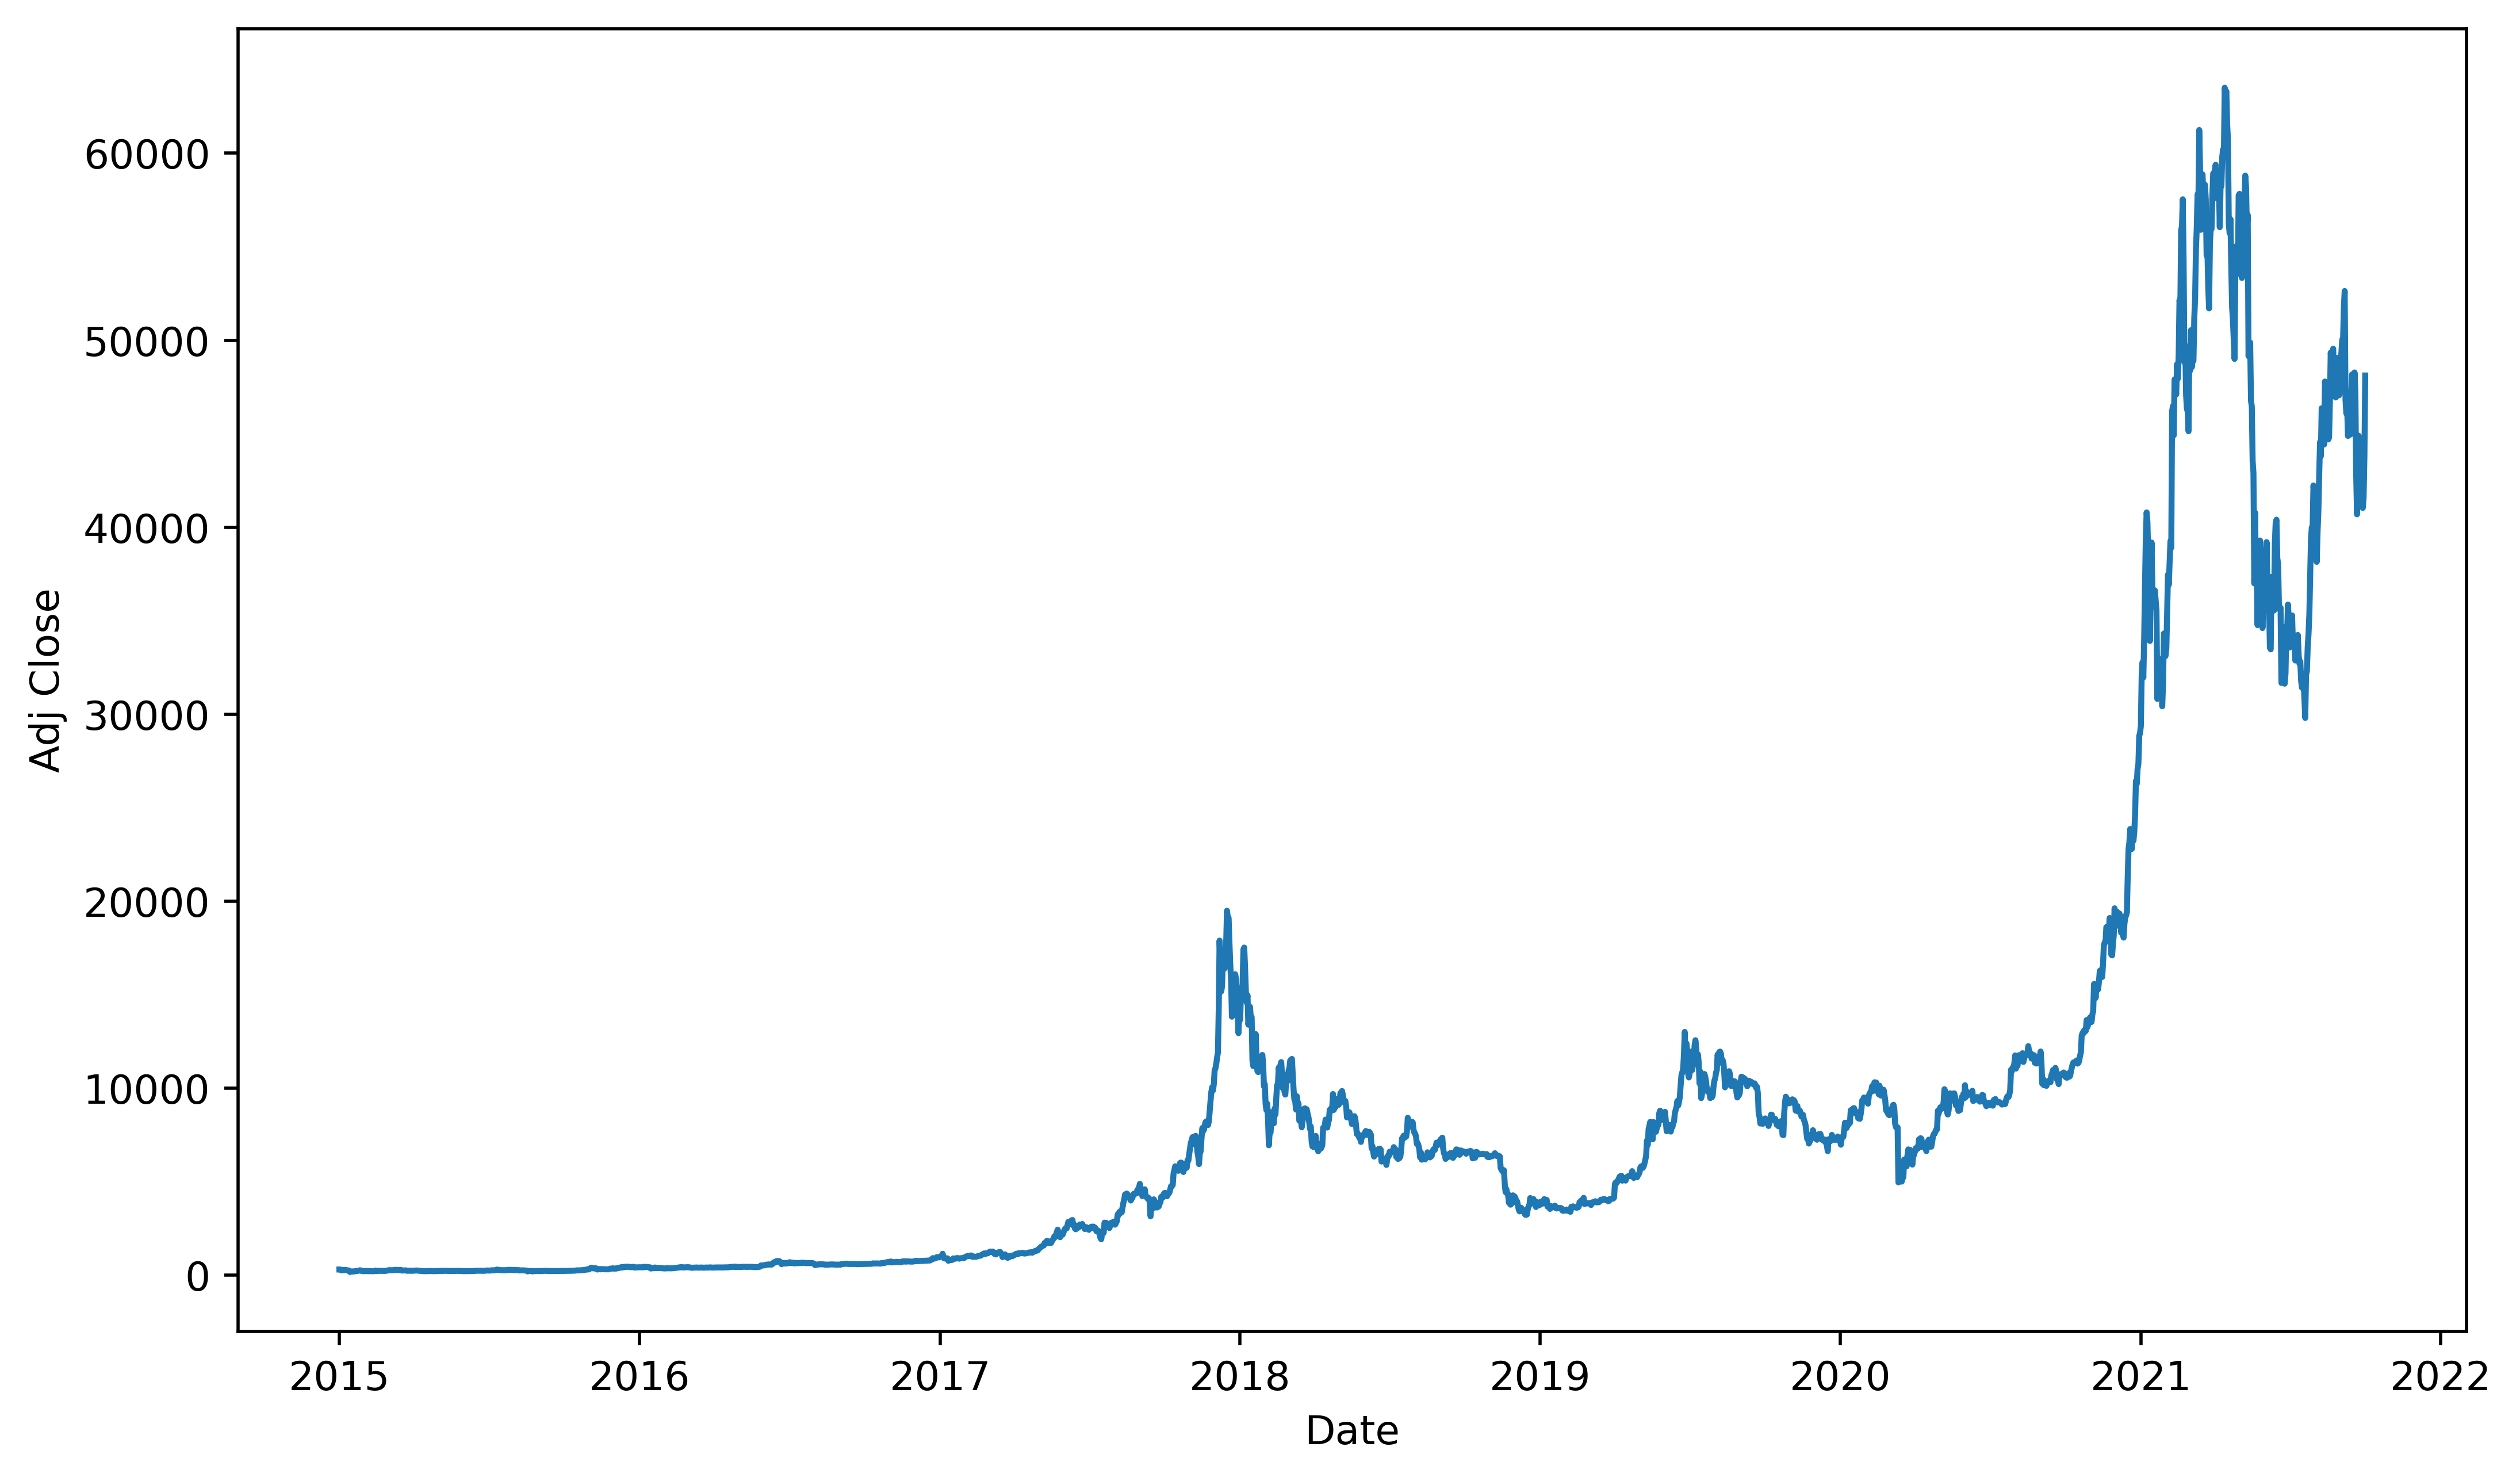

In [4]:
lineplot(df.index, df['Adj Close'])

In [5]:
X = df.drop('Adj Close', axis = 1)
y = df['Adj Close']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (1723, 5), X_test shape (739, 5), y_train shape (1723,), y_test shape(739,)


In [8]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Mean of the target 9537.008354453514 Mean square error is 9.850949964180798e-23 and mean absolute error is 5.996826851063254e-12


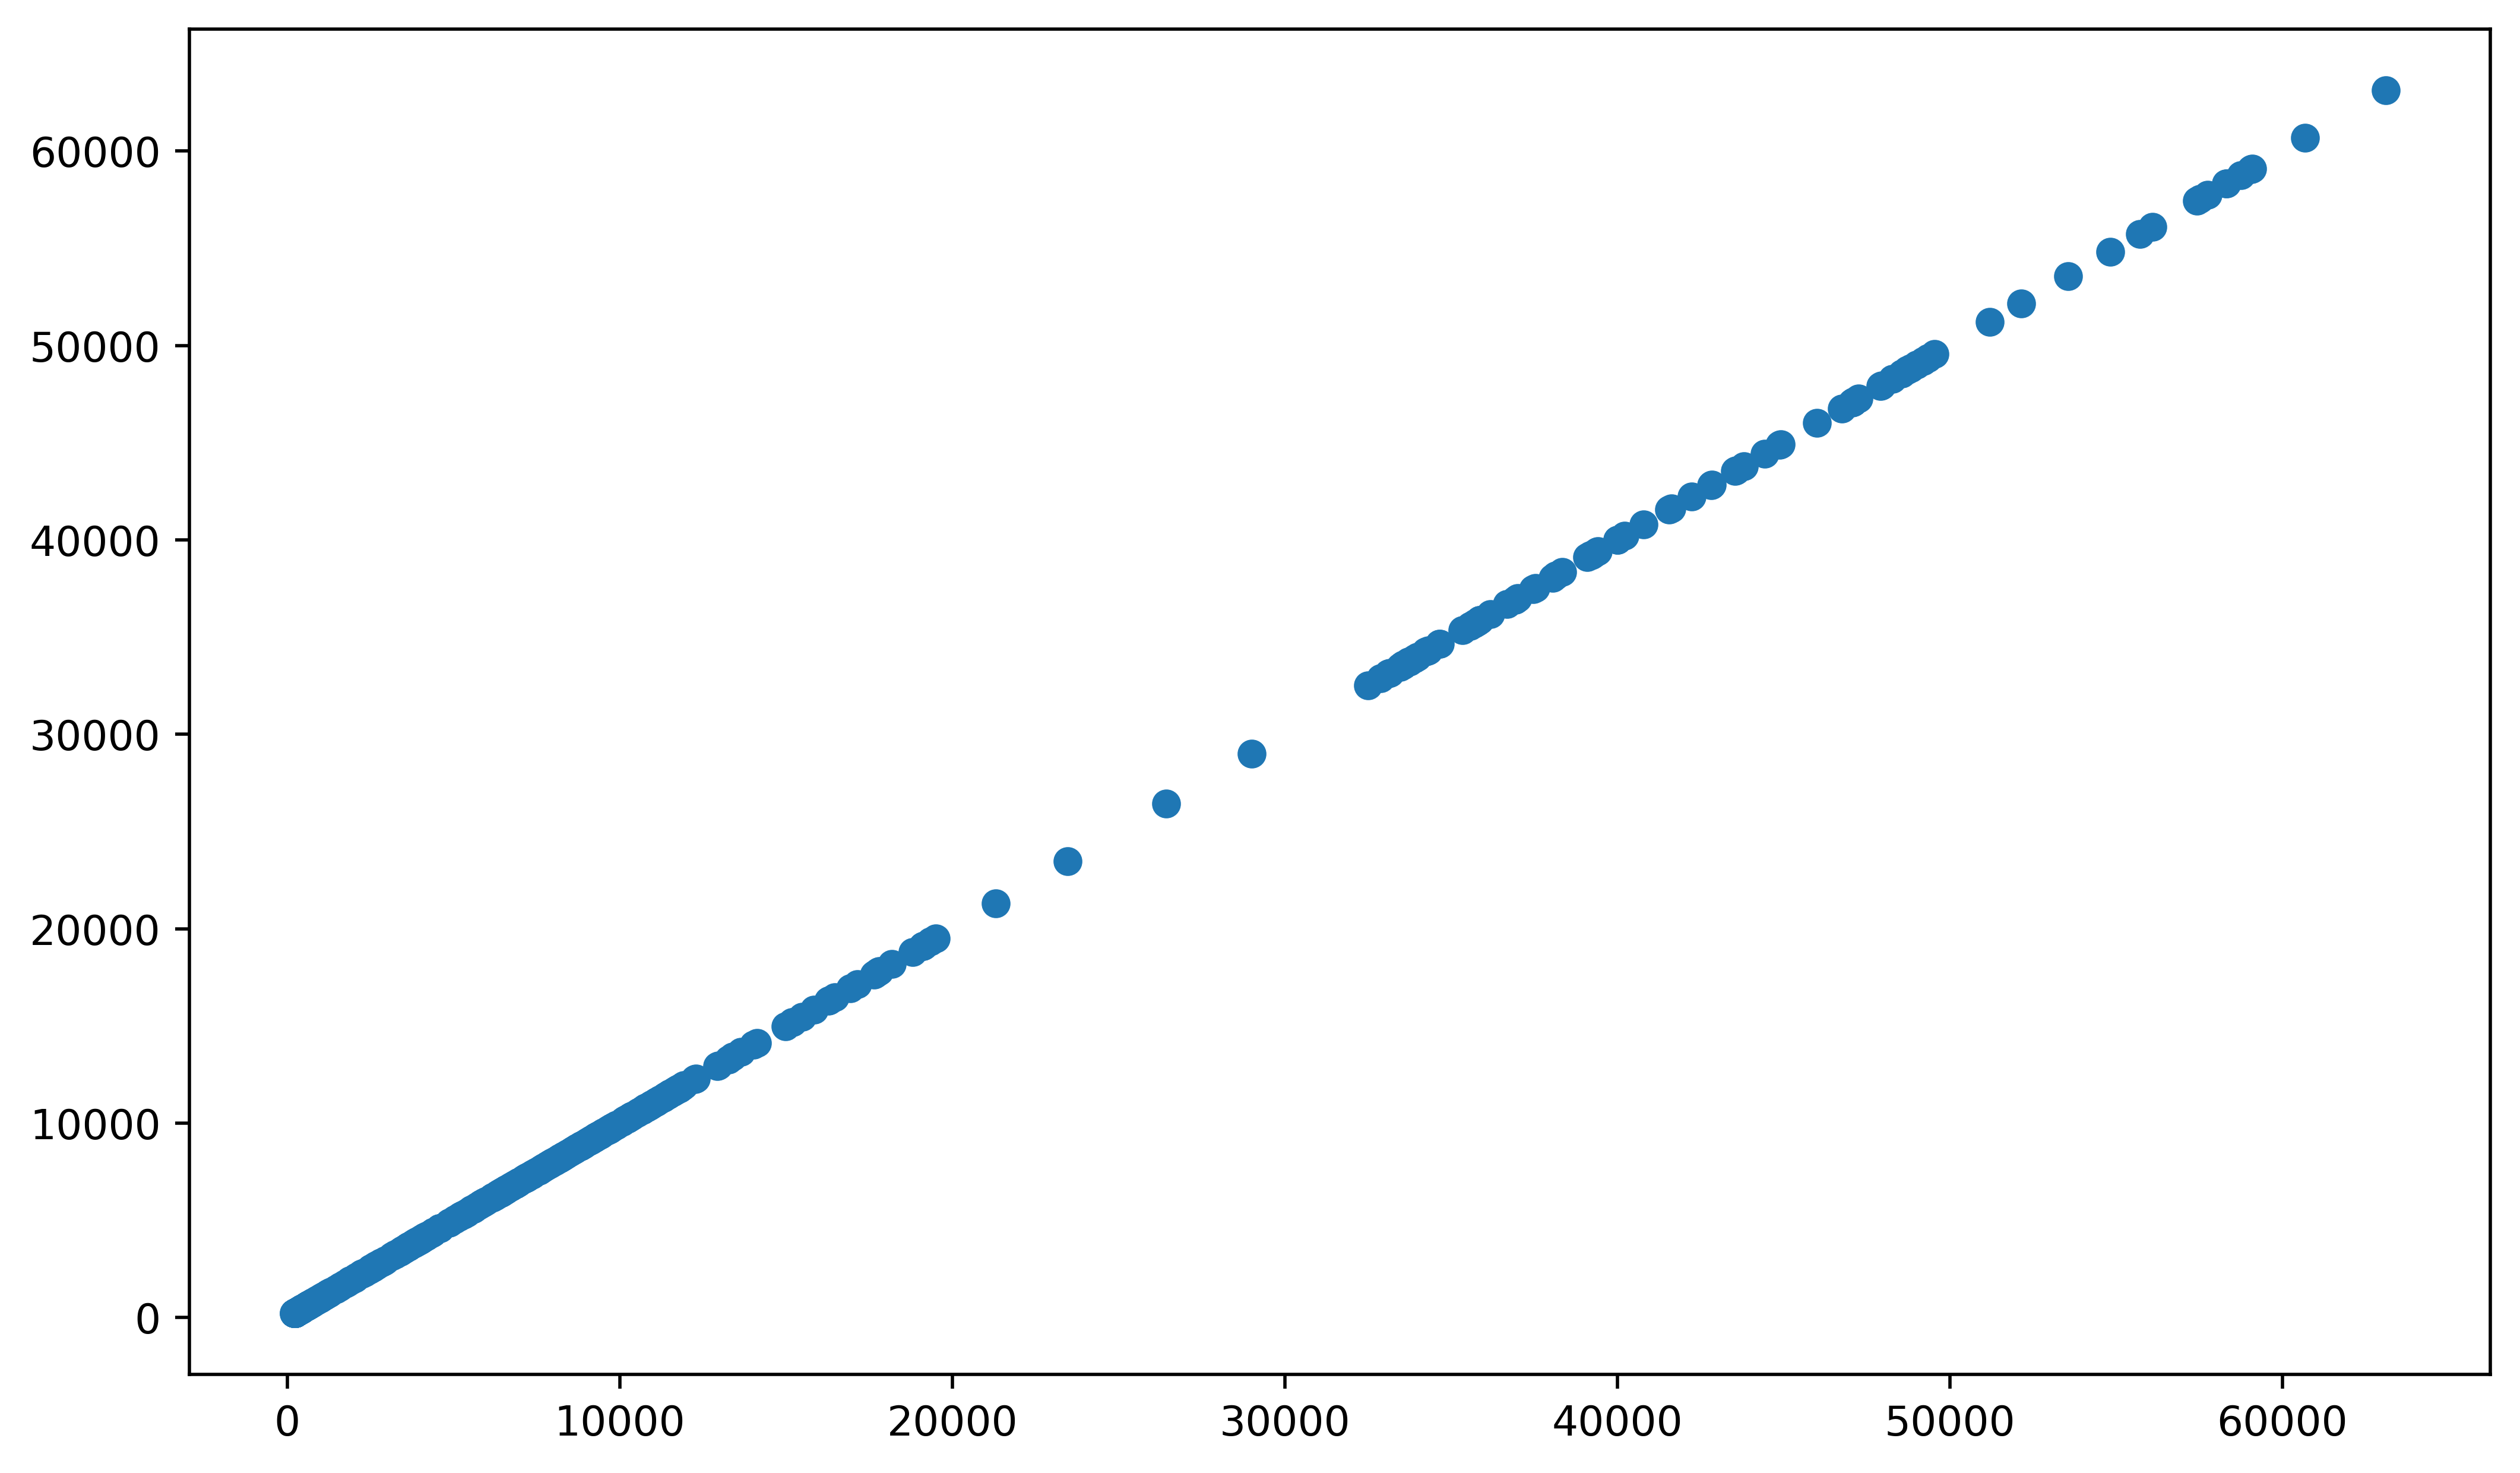

In [9]:
# Scikit learn 

def sklearn_model():
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f"Mean of the target {np.mean(df['Adj Close'])} Mean square error is {mean_squared_error(y_pred, y_test)} and mean absolute error is {mean_absolute_error(y_pred, y_test)}")
    
    plt.figure(figsize=(10, 6), dpi = 500)
    
    preds = pd.DataFrame({
        'predictions': y_pred, 
        'actuals': y_test})
    plt.scatter(preds['predictions'], preds['actuals'])

sklearn_model() 

In [28]:
# Tensorflow model

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 100)

model = Sequential([

  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, callbacks=[early_stop], epochs = 5000, 
          verbose = 1)

Epoch 1/5000
27/27 [==============================] - 1s 8ms/step - loss: 9548.2773 - val_loss: 9508.3115
Epoch 2/5000
27/27 [==============================] - 0s 3ms/step - loss: 9544.8457 - val_loss: 9500.6006
Epoch 3/5000
27/27 [==============================] - 0s 3ms/step - loss: 9525.8135 - val_loss: 9462.4854
Epoch 4/5000
27/27 [==============================] - 0s 3ms/step - loss: 9451.3281 - val_loss: 9330.6240
Epoch 5/5000
27/27 [==============================] - 0s 2ms/step - loss: 9231.1406 - val_loss: 9004.7734
Epoch 6/5000
27/27 [==============================] - 0s 3ms/step - loss: 8805.8779 - val_loss: 8505.2148
Epoch 7/5000
27/27 [==============================] - 0s 3ms/step - loss: 8207.4941 - val_loss: 7816.9619
Epoch 8/5000
27/27 [==============================] - 0s 2ms/step - loss: 7368.4189 - val_loss: 6803.4409
Epoch 9/5000
27/27 [==============================] - 0s 3ms/step - loss: 6183.2988 - val_loss: 5616.4888
Epoch 10/5000
27/27 [=========================

Epoch 79/5000
27/27 [==============================] - 0s 2ms/step - loss: 847.6612 - val_loss: 160.4386
Epoch 80/5000
27/27 [==============================] - 0s 3ms/step - loss: 753.8657 - val_loss: 236.6890
Epoch 81/5000
27/27 [==============================] - 0s 4ms/step - loss: 768.9479 - val_loss: 168.3820
Epoch 82/5000
27/27 [==============================] - 0s 4ms/step - loss: 820.4342 - val_loss: 179.7020
Epoch 83/5000
27/27 [==============================] - 0s 4ms/step - loss: 792.4246 - val_loss: 170.0765
Epoch 84/5000
27/27 [==============================] - 0s 4ms/step - loss: 769.7143 - val_loss: 237.2143
Epoch 85/5000
27/27 [==============================] - 0s 2ms/step - loss: 779.2145 - val_loss: 164.3360
Epoch 86/5000
27/27 [==============================] - 0s 2ms/step - loss: 753.6654 - val_loss: 153.4349
Epoch 87/5000
27/27 [==============================] - 0s 3ms/step - loss: 765.7851 - val_loss: 156.3076
Epoch 88/5000
27/27 [==============================] - 

27/27 [==============================] - 0s 2ms/step - loss: 754.3476 - val_loss: 161.1143
Epoch 157/5000
27/27 [==============================] - 0s 2ms/step - loss: 757.6584 - val_loss: 235.7686
Epoch 158/5000
27/27 [==============================] - 0s 2ms/step - loss: 798.2324 - val_loss: 155.4079
Epoch 159/5000
27/27 [==============================] - 0s 2ms/step - loss: 726.9483 - val_loss: 197.5498
Epoch 160/5000
27/27 [==============================] - 0s 2ms/step - loss: 793.5750 - val_loss: 172.0173
Epoch 161/5000
27/27 [==============================] - 0s 2ms/step - loss: 745.7277 - val_loss: 212.0373
Epoch 162/5000
27/27 [==============================] - 0s 2ms/step - loss: 803.9574 - val_loss: 153.8016
Epoch 163/5000
27/27 [==============================] - 0s 3ms/step - loss: 763.1281 - val_loss: 211.7688
Epoch 164/5000
27/27 [==============================] - 0s 2ms/step - loss: 763.9581 - val_loss: 160.5607
Epoch 165/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 748.2754 - val_loss: 197.4178
Epoch 234/5000
27/27 [==============================] - 0s 2ms/step - loss: 758.1909 - val_loss: 210.7249
Epoch 235/5000
27/27 [==============================] - 0s 2ms/step - loss: 778.2997 - val_loss: 253.6290
Epoch 236/5000
27/27 [==============================] - 0s 2ms/step - loss: 742.3171 - val_loss: 147.3761
Epoch 237/5000
27/27 [==============================] - 0s 2ms/step - loss: 738.6892 - val_loss: 243.7016
Epoch 238/5000
27/27 [==============================] - 0s 2ms/step - loss: 756.7811 - val_loss: 175.4003
Epoch 239/5000
27/27 [==============================] - 0s 2ms/step - loss: 756.0593 - val_loss: 166.0351
Epoch 240/5000
27/27 [==============================] - 0s 2ms/step - loss: 749.3666 - val_loss: 155.7957
Epoch 241/5000
27/27 [==============================] - 0s 2ms/step - loss: 784.8926 - val_loss: 145.5382
Epoch 242/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 780.8743 - val_loss: 189.0958
Epoch 311/5000
27/27 [==============================] - 0s 2ms/step - loss: 780.4753 - val_loss: 196.3992
Epoch 312/5000
27/27 [==============================] - 0s 2ms/step - loss: 725.7388 - val_loss: 197.2879
Epoch 313/5000
27/27 [==============================] - 0s 2ms/step - loss: 772.6386 - val_loss: 149.8386
Epoch 314/5000
27/27 [==============================] - 0s 2ms/step - loss: 785.9747 - val_loss: 259.5930
Epoch 315/5000
27/27 [==============================] - 0s 2ms/step - loss: 772.2667 - val_loss: 219.2534
Epoch 316/5000
27/27 [==============================] - 0s 2ms/step - loss: 766.8016 - val_loss: 149.8302
Epoch 317/5000
27/27 [==============================] - 0s 2ms/step - loss: 746.9582 - val_loss: 157.5977
Epoch 318/5000
27/27 [==============================] - 0s 2ms/step - loss: 738.6232 - val_loss: 150.5765
Epoch 319/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 776.4765 - val_loss: 176.6649
Epoch 388/5000
27/27 [==============================] - 0s 2ms/step - loss: 778.5327 - val_loss: 173.8477
Epoch 389/5000
27/27 [==============================] - 0s 2ms/step - loss: 745.4085 - val_loss: 154.7461
Epoch 390/5000
27/27 [==============================] - 0s 2ms/step - loss: 784.8229 - val_loss: 183.9903
Epoch 391/5000
27/27 [==============================] - 0s 2ms/step - loss: 792.6926 - val_loss: 149.1512
Epoch 392/5000
27/27 [==============================] - 0s 2ms/step - loss: 711.9688 - val_loss: 160.4880
Epoch 393/5000
27/27 [==============================] - 0s 2ms/step - loss: 800.4446 - val_loss: 161.9150
Epoch 394/5000
27/27 [==============================] - 0s 2ms/step - loss: 756.8393 - val_loss: 216.2001
Epoch 395/5000
27/27 [==============================] - 0s 2ms/step - loss: 748.8588 - val_loss: 143.5982
Epoch 396/5000
27/27 [==============================] - 0s 3m

27/27 [==============================] - 0s 2ms/step - loss: 786.6619 - val_loss: 165.6912
Epoch 465/5000
27/27 [==============================] - 0s 2ms/step - loss: 720.3796 - val_loss: 146.5489
Epoch 466/5000
27/27 [==============================] - 0s 3ms/step - loss: 748.7299 - val_loss: 249.6446
Epoch 467/5000
27/27 [==============================] - 0s 2ms/step - loss: 764.4292 - val_loss: 160.1633
Epoch 468/5000
27/27 [==============================] - 0s 2ms/step - loss: 780.2234 - val_loss: 153.0812
Epoch 469/5000
27/27 [==============================] - 0s 2ms/step - loss: 778.2426 - val_loss: 172.2095
Epoch 470/5000
27/27 [==============================] - 0s 2ms/step - loss: 733.0405 - val_loss: 198.8481
Epoch 471/5000
27/27 [==============================] - 0s 2ms/step - loss: 787.4449 - val_loss: 163.4125
Epoch 472/5000
27/27 [==============================] - 0s 2ms/step - loss: 773.3007 - val_loss: 234.4559
Epoch 473/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 767.9495 - val_loss: 156.7841
Epoch 542/5000
27/27 [==============================] - 0s 3ms/step - loss: 740.5028 - val_loss: 140.7388
Epoch 543/5000
27/27 [==============================] - 0s 3ms/step - loss: 781.7504 - val_loss: 173.7952
Epoch 544/5000
27/27 [==============================] - 0s 2ms/step - loss: 727.8968 - val_loss: 142.5612
Epoch 545/5000
27/27 [==============================] - 0s 2ms/step - loss: 743.7561 - val_loss: 182.9127
Epoch 546/5000
27/27 [==============================] - 0s 2ms/step - loss: 743.6549 - val_loss: 176.8758
Epoch 547/5000
27/27 [==============================] - 0s 2ms/step - loss: 757.7711 - val_loss: 250.8768
Epoch 548/5000
27/27 [==============================] - 0s 2ms/step - loss: 763.1820 - val_loss: 186.3932
Epoch 549/5000
27/27 [==============================] - 0s 2ms/step - loss: 742.1043 - val_loss: 142.5321
Epoch 550/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 770.5771 - val_loss: 135.1402
Epoch 619/5000
27/27 [==============================] - 0s 2ms/step - loss: 744.9037 - val_loss: 153.8699
Epoch 620/5000
27/27 [==============================] - 0s 2ms/step - loss: 754.3657 - val_loss: 277.3692
Epoch 621/5000
27/27 [==============================] - 0s 2ms/step - loss: 796.9189 - val_loss: 136.4975
Epoch 622/5000
27/27 [==============================] - 0s 2ms/step - loss: 721.9100 - val_loss: 135.5656
Epoch 623/5000
27/27 [==============================] - 0s 2ms/step - loss: 782.9839 - val_loss: 190.2736
Epoch 624/5000
27/27 [==============================] - 0s 2ms/step - loss: 718.2498 - val_loss: 136.8336
Epoch 625/5000
27/27 [==============================] - 0s 2ms/step - loss: 729.0101 - val_loss: 138.1018
Epoch 626/5000
27/27 [==============================] - 0s 2ms/step - loss: 757.2435 - val_loss: 196.1054
Epoch 627/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 746.1584 - val_loss: 255.1151
Epoch 696/5000
27/27 [==============================] - 0s 2ms/step - loss: 727.1127 - val_loss: 149.9433
Epoch 697/5000
27/27 [==============================] - 0s 2ms/step - loss: 768.5731 - val_loss: 143.9869
Epoch 698/5000
27/27 [==============================] - 0s 2ms/step - loss: 766.3222 - val_loss: 146.3036
Epoch 699/5000
27/27 [==============================] - 0s 2ms/step - loss: 753.2762 - val_loss: 132.9019
Epoch 700/5000
27/27 [==============================] - 0s 2ms/step - loss: 723.0888 - val_loss: 175.4297
Epoch 701/5000
27/27 [==============================] - 0s 2ms/step - loss: 766.5435 - val_loss: 135.1983
Epoch 702/5000
27/27 [==============================] - 0s 2ms/step - loss: 737.7126 - val_loss: 250.3043
Epoch 703/5000
27/27 [==============================] - 0s 2ms/step - loss: 770.8488 - val_loss: 144.2302
Epoch 704/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 788.1554 - val_loss: 152.7051
Epoch 773/5000
27/27 [==============================] - 0s 2ms/step - loss: 745.4766 - val_loss: 149.0261
Epoch 774/5000
27/27 [==============================] - 0s 2ms/step - loss: 754.4249 - val_loss: 211.1712
Epoch 775/5000
27/27 [==============================] - 0s 2ms/step - loss: 776.6601 - val_loss: 130.8988
Epoch 776/5000
27/27 [==============================] - 0s 2ms/step - loss: 734.3066 - val_loss: 305.8998
Epoch 777/5000
27/27 [==============================] - 0s 2ms/step - loss: 744.9095 - val_loss: 145.2457
Epoch 778/5000
27/27 [==============================] - 0s 2ms/step - loss: 769.4269 - val_loss: 132.3855
Epoch 779/5000
27/27 [==============================] - 0s 2ms/step - loss: 711.4355 - val_loss: 178.4752
Epoch 780/5000
27/27 [==============================] - 0s 2ms/step - loss: 769.4601 - val_loss: 150.2023
Epoch 781/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 767.3162 - val_loss: 136.1392
Epoch 850/5000
27/27 [==============================] - 0s 2ms/step - loss: 752.2974 - val_loss: 175.5620
Epoch 851/5000
27/27 [==============================] - 0s 2ms/step - loss: 754.6256 - val_loss: 225.1815
Epoch 852/5000
27/27 [==============================] - 0s 2ms/step - loss: 730.7097 - val_loss: 137.4565
Epoch 853/5000
27/27 [==============================] - 0s 2ms/step - loss: 713.2160 - val_loss: 251.9493
Epoch 854/5000
27/27 [==============================] - 0s 2ms/step - loss: 759.3986 - val_loss: 156.6208
Epoch 855/5000
27/27 [==============================] - 0s 2ms/step - loss: 724.8046 - val_loss: 311.6120
Epoch 856/5000
27/27 [==============================] - 0s 2ms/step - loss: 767.8341 - val_loss: 142.7374
Epoch 857/5000
27/27 [==============================] - 0s 2ms/step - loss: 787.1122 - val_loss: 231.3121
Epoch 858/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 794.6849 - val_loss: 123.7404
Epoch 927/5000
27/27 [==============================] - 0s 2ms/step - loss: 708.5517 - val_loss: 174.4904
Epoch 928/5000
27/27 [==============================] - 0s 2ms/step - loss: 799.8218 - val_loss: 185.8299
Epoch 929/5000
27/27 [==============================] - 0s 2ms/step - loss: 772.3924 - val_loss: 163.3526
Epoch 930/5000
27/27 [==============================] - 0s 2ms/step - loss: 765.7572 - val_loss: 200.4733
Epoch 931/5000
27/27 [==============================] - 0s 2ms/step - loss: 764.5278 - val_loss: 230.0875
Epoch 932/5000
27/27 [==============================] - 0s 2ms/step - loss: 758.6350 - val_loss: 198.8381
Epoch 933/5000
27/27 [==============================] - 0s 2ms/step - loss: 799.7934 - val_loss: 139.6683
Epoch 934/5000
27/27 [==============================] - 0s 2ms/step - loss: 757.8963 - val_loss: 156.3287
Epoch 935/5000
27/27 [==============================] - 0s 2m

27/27 [==============================] - 0s 2ms/step - loss: 748.4213 - val_loss: 232.2590
Epoch 1004/5000
27/27 [==============================] - 0s 2ms/step - loss: 786.8873 - val_loss: 144.4618
Epoch 1005/5000
27/27 [==============================] - 0s 2ms/step - loss: 776.2687 - val_loss: 261.7898
Epoch 1006/5000
27/27 [==============================] - 0s 2ms/step - loss: 718.3969 - val_loss: 175.3940
Epoch 1007/5000
27/27 [==============================] - 0s 2ms/step - loss: 750.4872 - val_loss: 128.2513
Epoch 1008/5000
27/27 [==============================] - 0s 2ms/step - loss: 768.8101 - val_loss: 174.1197
Epoch 1009/5000
27/27 [==============================] - 0s 2ms/step - loss: 728.2144 - val_loss: 189.7526
Epoch 1010/5000
27/27 [==============================] - 0s 2ms/step - loss: 760.0137 - val_loss: 135.4067
Epoch 1011/5000
27/27 [==============================] - 0s 3ms/step - loss: 743.2195 - val_loss: 156.8660
Epoch 1012/5000
27/27 [==============================

27/27 [==============================] - 0s 2ms/step - loss: 777.7587 - val_loss: 224.9201
Epoch 1080/5000
27/27 [==============================] - 0s 2ms/step - loss: 783.2954 - val_loss: 251.6658
Epoch 1081/5000
27/27 [==============================] - 0s 2ms/step - loss: 775.6955 - val_loss: 264.8200
Epoch 1082/5000
27/27 [==============================] - 0s 2ms/step - loss: 757.7784 - val_loss: 173.3130
Epoch 1083/5000
27/27 [==============================] - 0s 2ms/step - loss: 745.2218 - val_loss: 277.7429
Epoch 1084/5000
27/27 [==============================] - 0s 2ms/step - loss: 759.0733 - val_loss: 146.1551
Epoch 1085/5000
27/27 [==============================] - 0s 2ms/step - loss: 753.5881 - val_loss: 215.2831
Epoch 1086/5000
27/27 [==============================] - 0s 2ms/step - loss: 702.2423 - val_loss: 235.0894
Epoch 1087/5000
27/27 [==============================] - 0s 2ms/step - loss: 758.5755 - val_loss: 139.6200
Epoch 1088/5000
27/27 [==============================

27/27 [==============================] - 0s 2ms/step - loss: 743.8554 - val_loss: 132.3444
Epoch 1156/5000
27/27 [==============================] - 0s 2ms/step - loss: 724.2267 - val_loss: 231.4864
Epoch 1157/5000
27/27 [==============================] - 0s 2ms/step - loss: 731.5436 - val_loss: 280.1415
Epoch 1158/5000
27/27 [==============================] - 0s 2ms/step - loss: 746.4638 - val_loss: 140.2838
Epoch 1159/5000
27/27 [==============================] - 0s 2ms/step - loss: 782.4135 - val_loss: 116.3545
Epoch 1160/5000
27/27 [==============================] - 0s 2ms/step - loss: 785.4611 - val_loss: 221.0769
Epoch 1161/5000
27/27 [==============================] - 0s 2ms/step - loss: 746.1638 - val_loss: 144.4213
Epoch 1162/5000
27/27 [==============================] - 0s 2ms/step - loss: 755.2604 - val_loss: 158.5606
Epoch 1163/5000
27/27 [==============================] - 0s 2ms/step - loss: 734.3040 - val_loss: 164.8170
Epoch 1164/5000
27/27 [==============================

27/27 [==============================] - 0s 2ms/step - loss: 755.7618 - val_loss: 256.9872
Epoch 1232/5000
27/27 [==============================] - 0s 2ms/step - loss: 747.4039 - val_loss: 115.0624
Epoch 1233/5000
27/27 [==============================] - 0s 2ms/step - loss: 724.5992 - val_loss: 183.9740
Epoch 1234/5000
27/27 [==============================] - 0s 2ms/step - loss: 762.5836 - val_loss: 209.4020
Epoch 1235/5000
27/27 [==============================] - 0s 2ms/step - loss: 766.8089 - val_loss: 203.8558
Epoch 1236/5000
27/27 [==============================] - 0s 2ms/step - loss: 738.1761 - val_loss: 115.4754
Epoch 1237/5000
27/27 [==============================] - 0s 2ms/step - loss: 744.6311 - val_loss: 220.4192
Epoch 1238/5000
27/27 [==============================] - 0s 2ms/step - loss: 731.6104 - val_loss: 164.5967
Epoch 1239/5000
27/27 [==============================] - 0s 2ms/step - loss: 761.6214 - val_loss: 209.0940
Epoch 1240/5000
27/27 [==============================

27/27 [==============================] - 0s 2ms/step - loss: 734.6749 - val_loss: 174.2631
Epoch 1308/5000
27/27 [==============================] - 0s 2ms/step - loss: 771.3348 - val_loss: 163.3434
Epoch 1309/5000
27/27 [==============================] - 0s 2ms/step - loss: 746.4022 - val_loss: 121.4043
Epoch 1310/5000
27/27 [==============================] - 0s 2ms/step - loss: 763.3686 - val_loss: 184.1179
Epoch 1311/5000
27/27 [==============================] - 0s 2ms/step - loss: 786.4419 - val_loss: 115.9342
Epoch 1312/5000
27/27 [==============================] - 0s 2ms/step - loss: 746.3848 - val_loss: 149.8727
Epoch 1313/5000
27/27 [==============================] - 0s 2ms/step - loss: 769.2060 - val_loss: 167.5478
Epoch 1314/5000
27/27 [==============================] - 0s 2ms/step - loss: 726.6403 - val_loss: 143.8711
Epoch 1315/5000
27/27 [==============================] - 0s 2ms/step - loss: 742.9896 - val_loss: 161.6863
Epoch 1316/5000
27/27 [==============================

27/27 [==============================] - 0s 2ms/step - loss: 782.7749 - val_loss: 185.4194
Epoch 1384/5000
27/27 [==============================] - 0s 2ms/step - loss: 733.6458 - val_loss: 131.3695
Epoch 1385/5000
27/27 [==============================] - 0s 2ms/step - loss: 770.4674 - val_loss: 253.9376
Epoch 1386/5000
27/27 [==============================] - 0s 2ms/step - loss: 743.8297 - val_loss: 214.5039
Epoch 1387/5000
27/27 [==============================] - 0s 2ms/step - loss: 730.8600 - val_loss: 290.4868
Epoch 1388/5000
27/27 [==============================] - 0s 2ms/step - loss: 764.4854 - val_loss: 125.9610
Epoch 1389/5000
27/27 [==============================] - 0s 2ms/step - loss: 745.8262 - val_loss: 275.5700
Epoch 1390/5000
27/27 [==============================] - 0s 2ms/step - loss: 768.0219 - val_loss: 149.3652
Epoch 1391/5000
27/27 [==============================] - 0s 2ms/step - loss: 764.0760 - val_loss: 159.4438
Epoch 1392/5000
27/27 [==============================

27/27 [==============================] - 0s 2ms/step - loss: 728.9545 - val_loss: 147.5576
Epoch 1460/5000
27/27 [==============================] - 0s 2ms/step - loss: 783.1346 - val_loss: 108.3546
Epoch 1461/5000
27/27 [==============================] - 0s 2ms/step - loss: 739.2880 - val_loss: 291.7365
Epoch 1462/5000
27/27 [==============================] - 0s 2ms/step - loss: 744.6198 - val_loss: 152.6184
Epoch 1463/5000
27/27 [==============================] - 0s 2ms/step - loss: 750.5798 - val_loss: 132.8609
Epoch 1464/5000
27/27 [==============================] - 0s 2ms/step - loss: 793.3976 - val_loss: 241.4656
Epoch 1465/5000
27/27 [==============================] - 0s 2ms/step - loss: 765.2197 - val_loss: 201.4195
Epoch 1466/5000
27/27 [==============================] - 0s 2ms/step - loss: 767.0624 - val_loss: 242.5144
Epoch 1467/5000
27/27 [==============================] - 0s 2ms/step - loss: 779.2911 - val_loss: 185.7586
Epoch 1468/5000
27/27 [==============================

27/27 [==============================] - 0s 2ms/step - loss: 728.2504 - val_loss: 207.5291
Epoch 1536/5000
27/27 [==============================] - 0s 2ms/step - loss: 737.7524 - val_loss: 198.7479
Epoch 1537/5000
27/27 [==============================] - 0s 2ms/step - loss: 783.7436 - val_loss: 147.0261
Epoch 1538/5000
27/27 [==============================] - 0s 2ms/step - loss: 727.6451 - val_loss: 265.8066
Epoch 1539/5000
27/27 [==============================] - 0s 2ms/step - loss: 714.4908 - val_loss: 126.2494
Epoch 1540/5000
27/27 [==============================] - 0s 2ms/step - loss: 764.8091 - val_loss: 114.6535
Epoch 1541/5000
27/27 [==============================] - 0s 2ms/step - loss: 702.6613 - val_loss: 166.1316
Epoch 1542/5000
27/27 [==============================] - 0s 2ms/step - loss: 738.1900 - val_loss: 241.2722
Epoch 1543/5000
27/27 [==============================] - 0s 2ms/step - loss: 742.6166 - val_loss: 124.5206
Epoch 1544/5000
27/27 [==============================

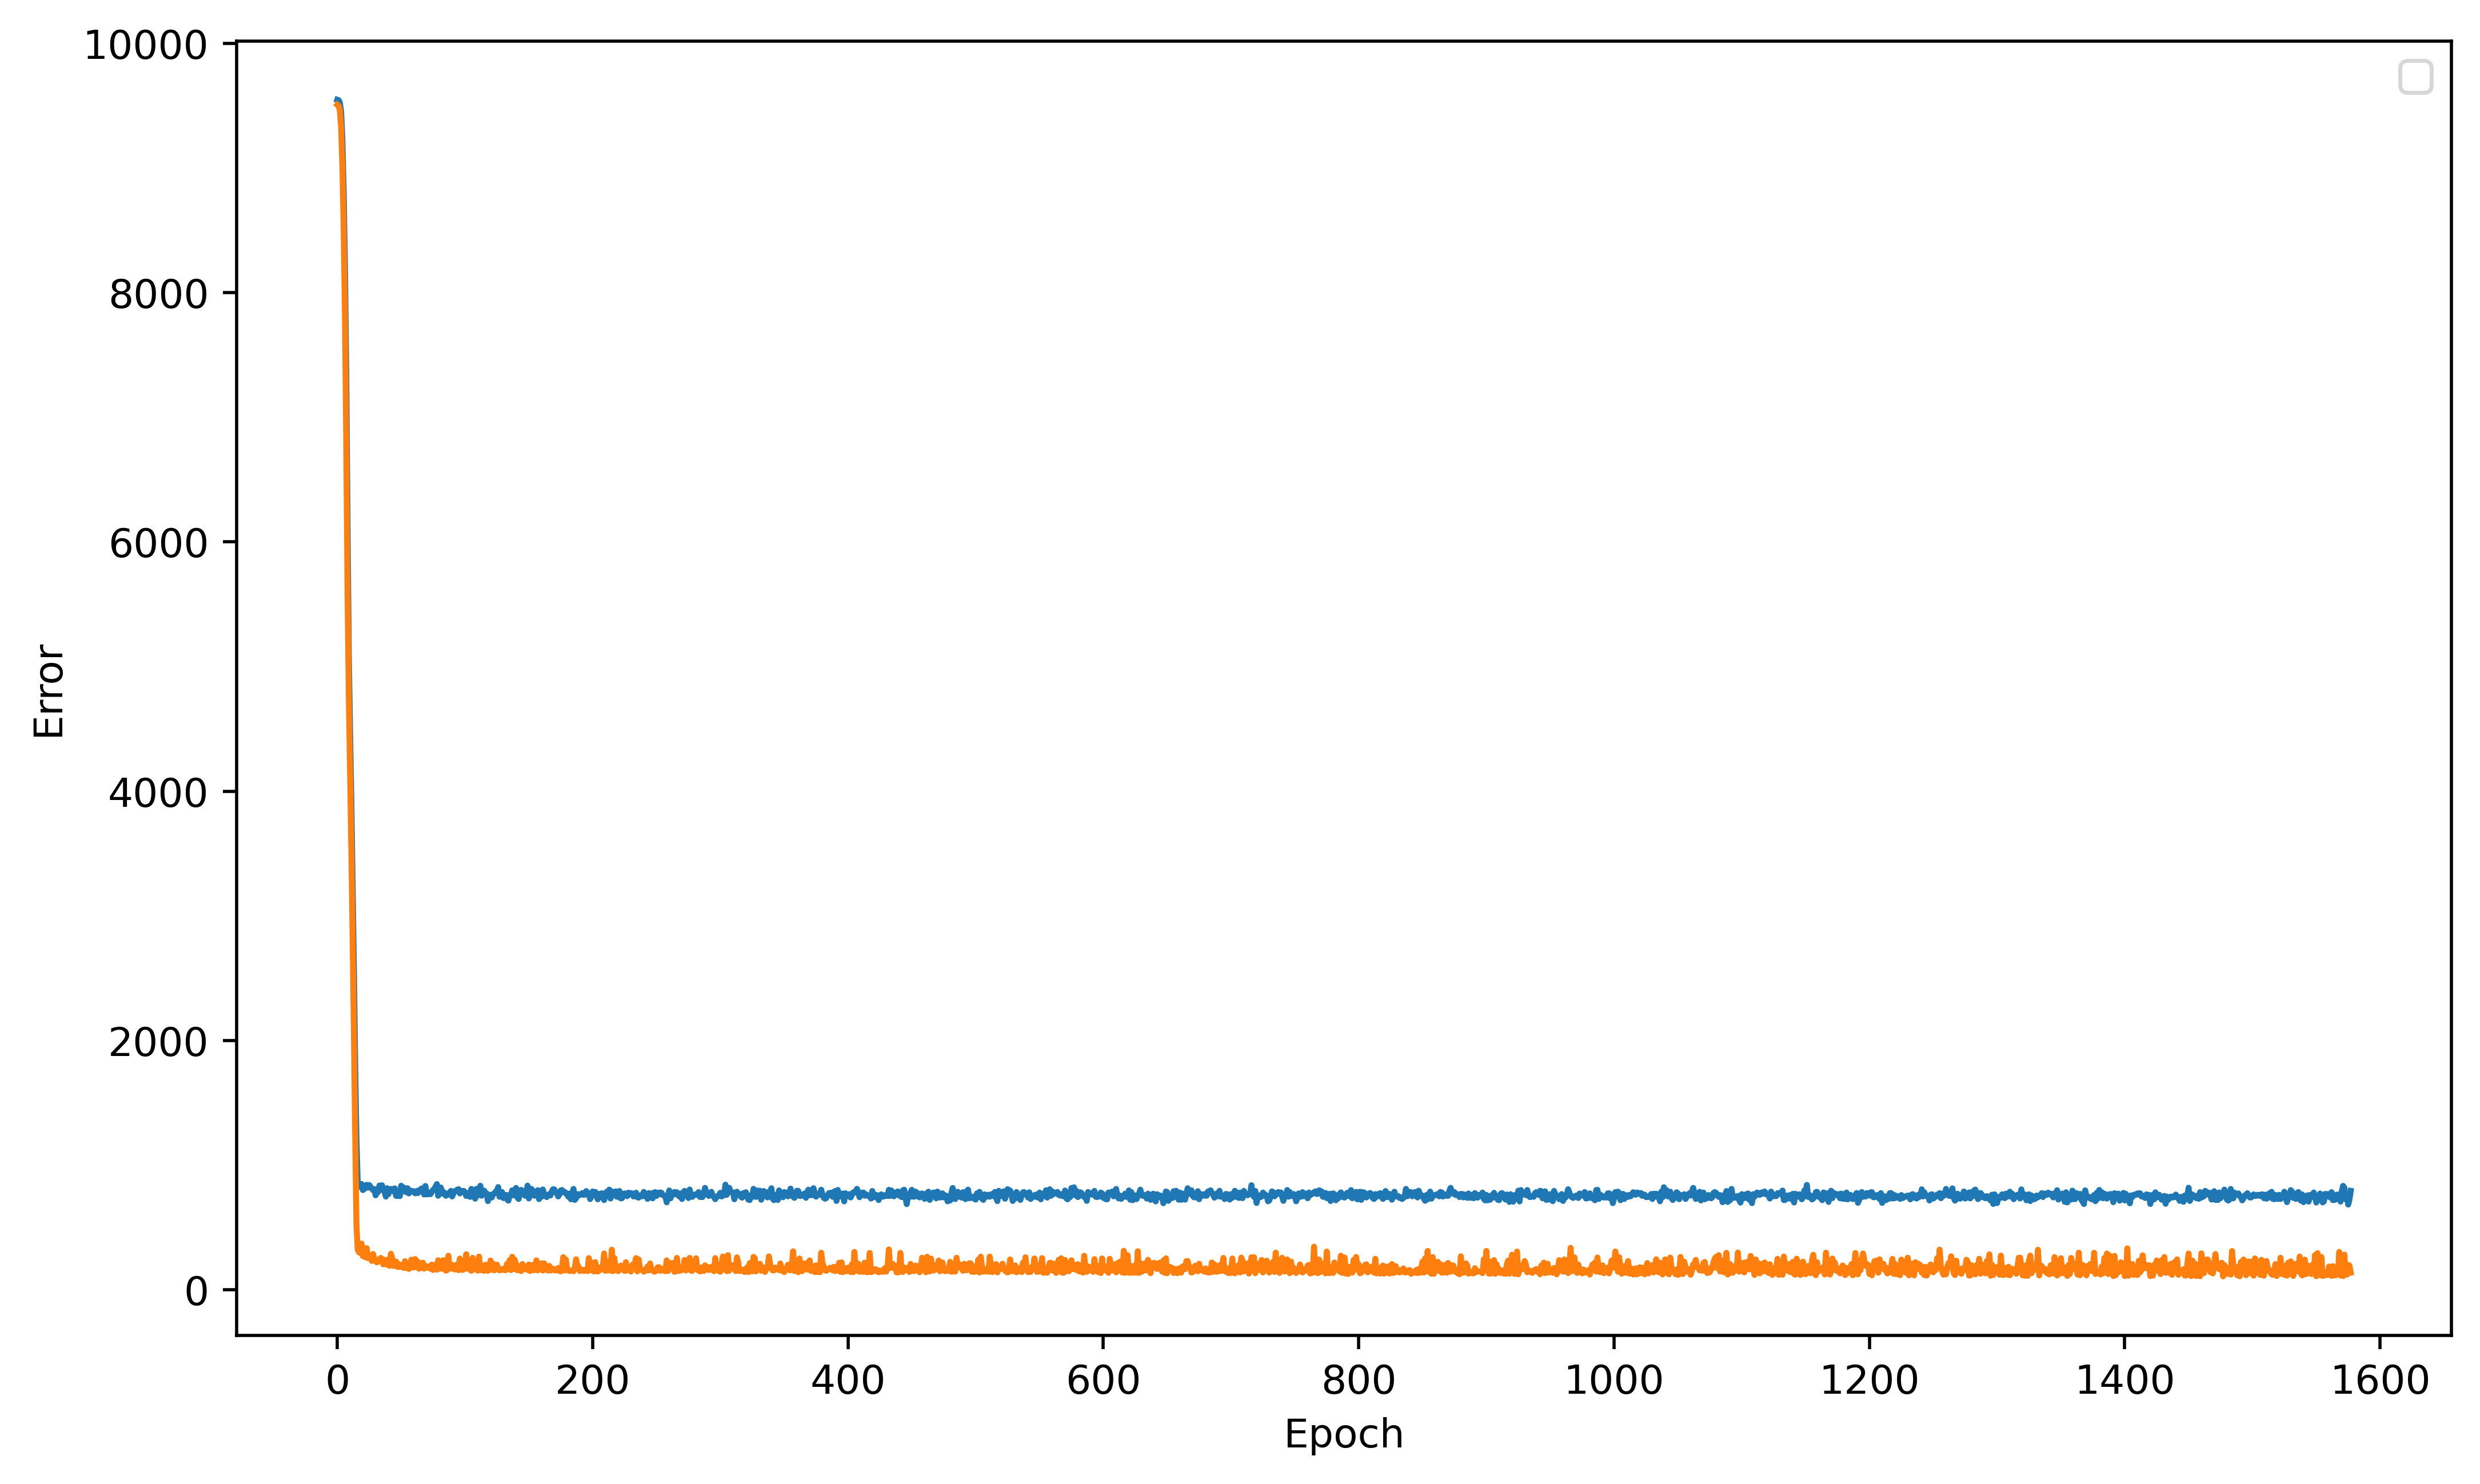

In [29]:
model_loss = pd.DataFrame(model.history.history)
labels = ['validation', 'loss']
plt.figure(figsize=(10, 6), dpi = 500)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(labels=labels)
plt.plot(model_loss)

In [30]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 136.7937


136.79367065429688

In [31]:
model.evaluate(X_train, y_train)

54/54 [==============================] - 0s 755us/step - loss: 138.1644


138.16444396972656

In [32]:
pred = model.predict(X_test)

In [33]:
pred = pred.reshape(-1)

In [34]:
comp = pd.DataFrame({
    'actual': y_test,
    'predicted': pred
})

comp

,actual,predicted
Date,,
2017-01-13,823.984009,812.002014
2015-07-29,289.589996,293.362915
2021-04-25,49004.253906,48588.355469
2019-06-01,8564.016602,8474.019531
2015-08-04,285.217987,286.638550
...,...,...
2019-08-05,11805.653320,11429.593750
2017-11-26,9330.549805,9116.550781
2017-01-12,804.833984,794.627563


In [35]:
comp['diff'] = comp['actual'] - comp['predicted']

In [36]:
comp

,actual,predicted,diff
Date,,,
2017-01-13,823.984009,812.002014,11.981995
2015-07-29,289.589996,293.362915,-3.772919
2021-04-25,49004.253906,48588.355469,415.898438
2019-06-01,8564.016602,8474.019531,89.997070
2015-08-04,285.217987,286.638550,-1.420563
...,...,...,...
2019-08-05,11805.653320,11429.593750,376.059570
2017-11-26,9330.549805,9116.550781,213.999023
2017-01-12,804.833984,794.627563,10.206421


/Users/bengroves/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual', ylabel='predicted'>

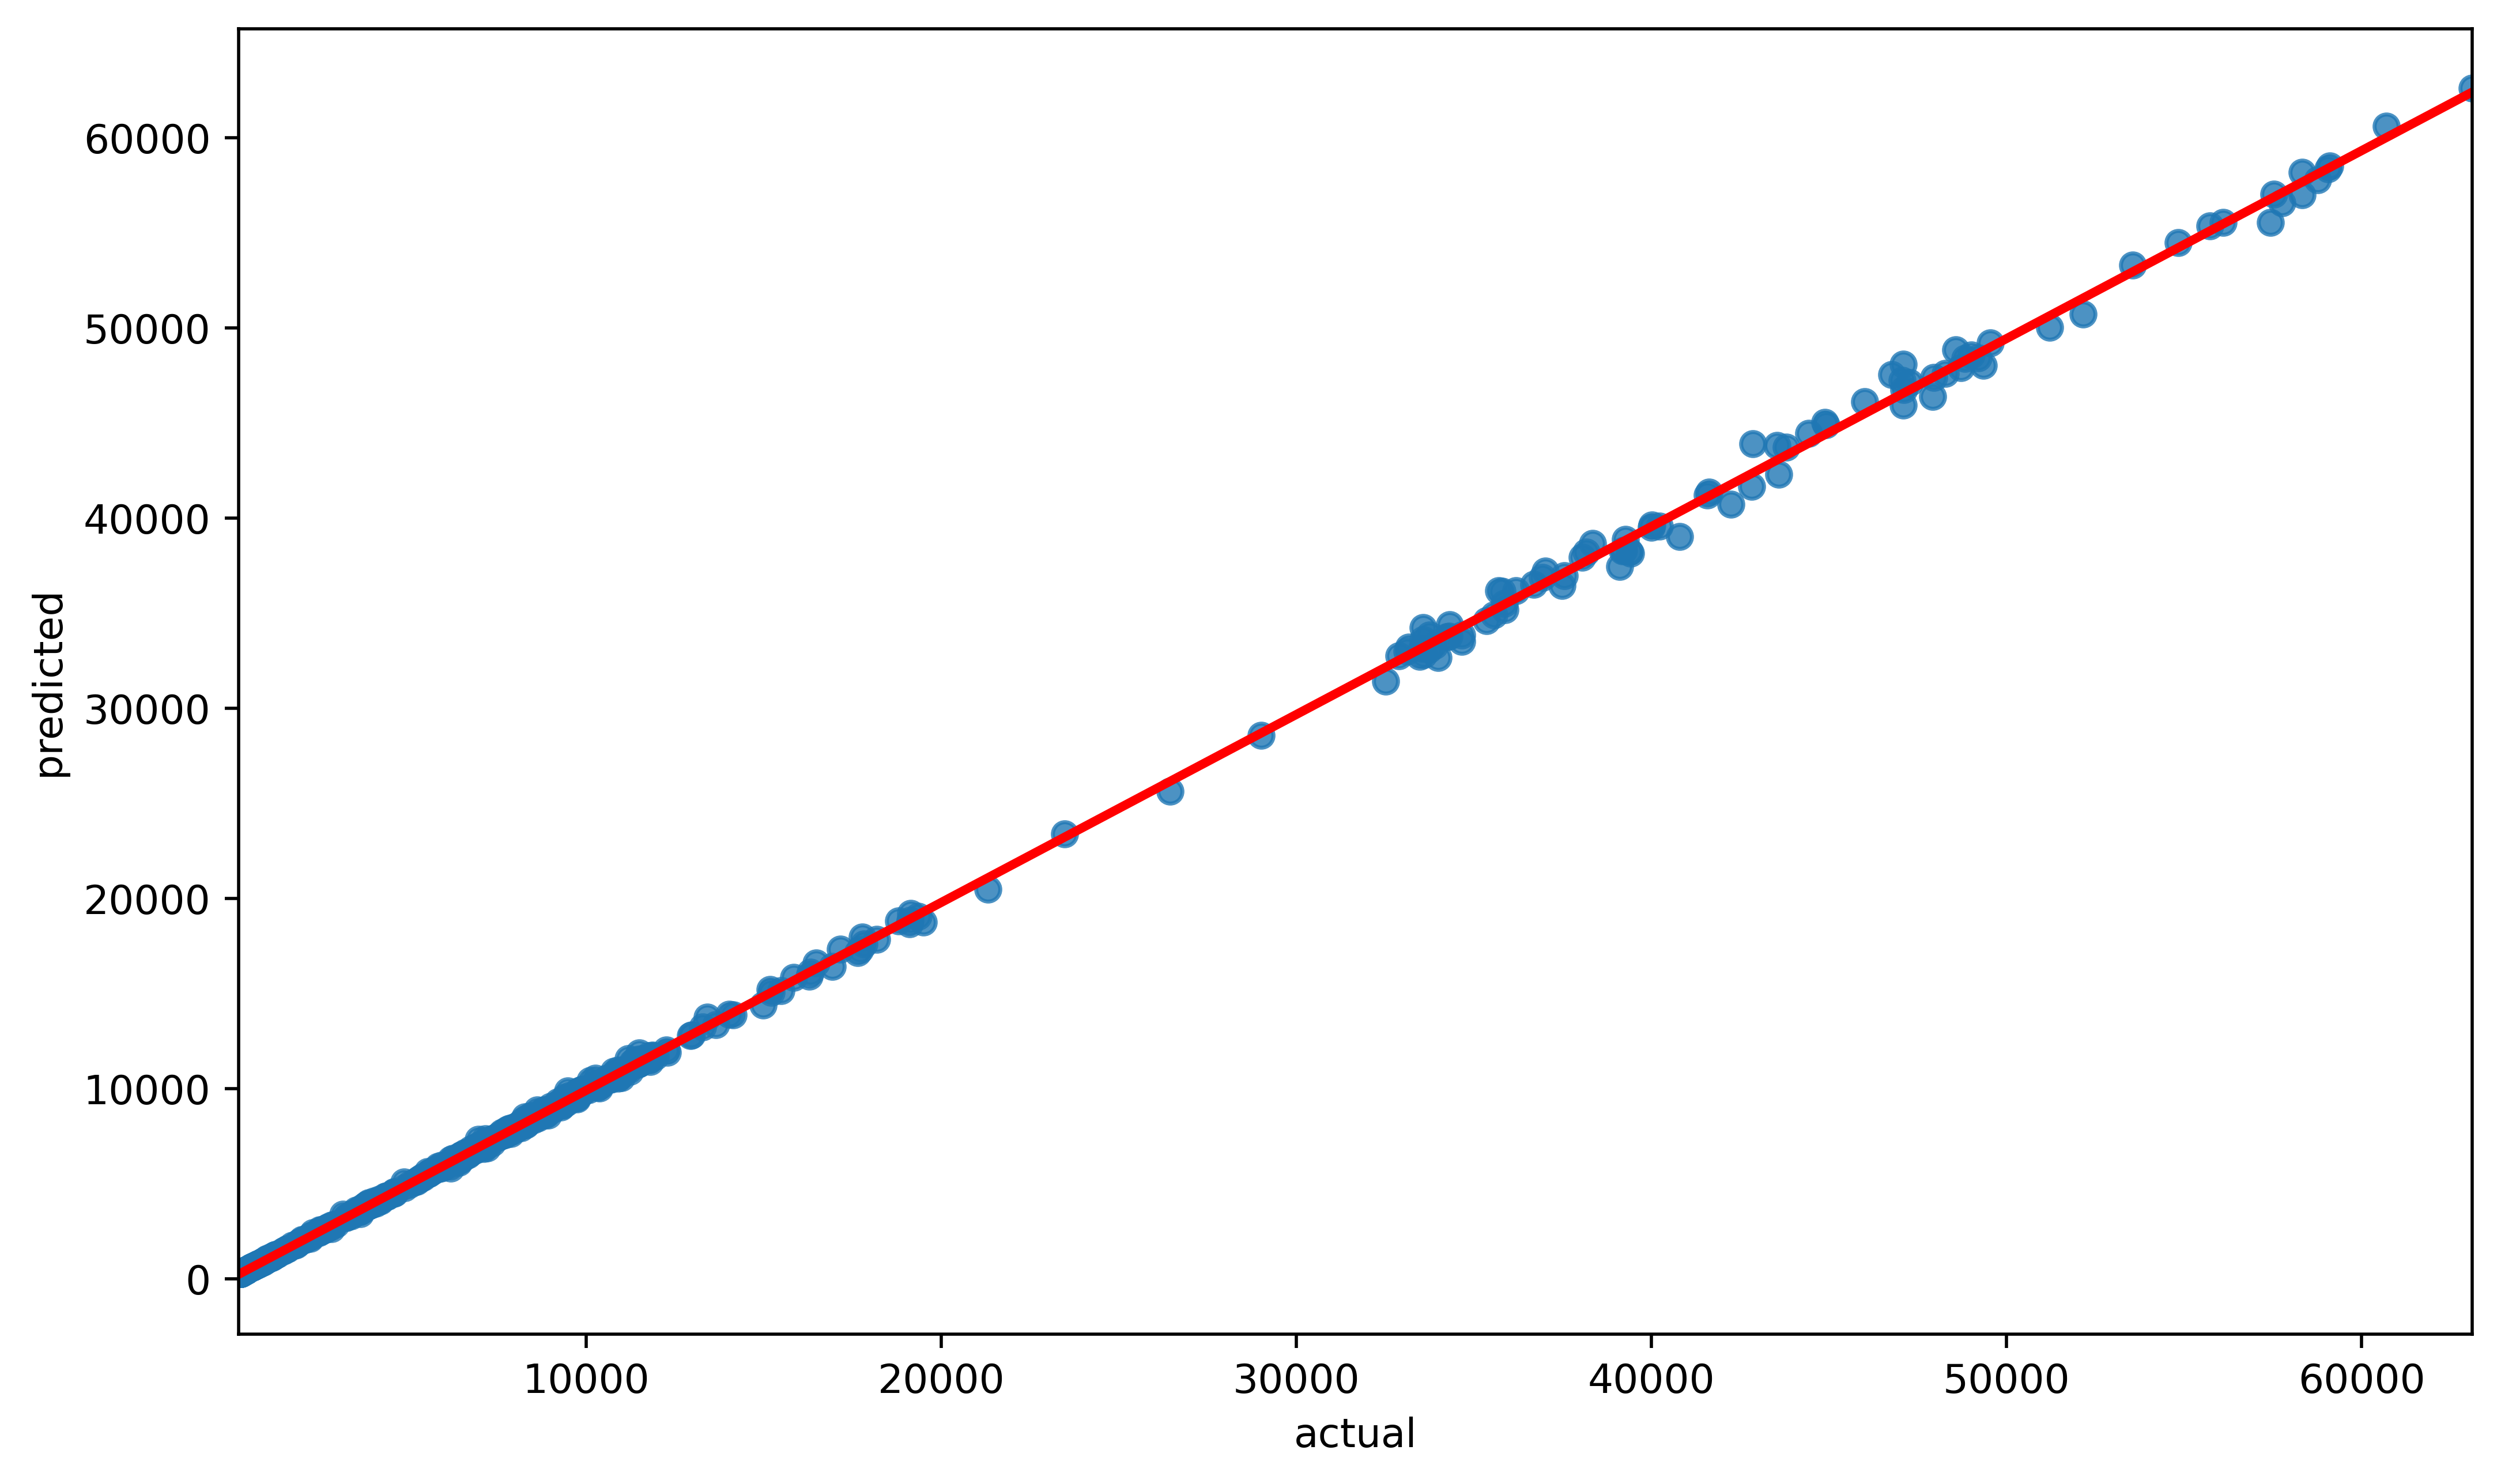

In [37]:
plt.figure(figsize=(10, 6), dpi = 500)
plt.ylabel("Actual value")
plt.xlabel("Predicted value")
sns.regplot(comp['actual'], comp['predicted'], line_kws={"color": "red"})

In [38]:
np.mean(comp['diff'])

92.923452808344

In [39]:
df.iloc[0]

Open         3.204350e+02
High         3.204350e+02
Low          3.140030e+02
Close        3.142490e+02
Adj Close    3.142490e+02
Volume       8.036550e+06
Name: 2015-01-01 00:00:00, dtype: float64

In [40]:
test = pd.Series([320.43, 320.43, 314.002, 314.248, 314.248])
test = test.values.reshape(-1,5)

In [41]:
test = scaler.transform(test)

In [47]:
model.predict(test)

array([[319.928]], dtype=float32)

In [48]:
df['Adj Close'][0]

314.2489929199219